# Finite differences Error

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

var_x, var_eps = var("x, eps")
g = (var_x/var_eps)**3 - 3*(var_x/var_eps)**2 + 3*(var_x/var_eps)
G = S(1)/(g) - S(1)
DG = diff(G,var_x);
print("g:=", G)
print("g_prime:=",DG)

eps = 1.25e-2
h = 1e-6
d = 0.0120849

x = np.geomspace(1e-10, .1,10)
g = lambda x,eps: -1 + 1/(3*x/eps - 3*x**2/eps**2 + x**3/eps**3)
g_prime = lambda x,eps : (-3/eps + 6*x/eps**2 - 3*x**2/eps**3)/(3*x/eps - 3*x**2/eps**2 + x**3/eps**3)**2

def diff(x, eps):
    diffx = [0] * len(x)
    for i, xi in enumerate(x):
        hi = min(1e-12,xi**3)
        diffx[i] = (g(xi-0.5*hi,eps) - g(xi+0.5*hi,eps))/hi
    return diffx

def cstep(x, eps):
    cstepx = [0] * len(x)
    for i, xi in enumerate(x):
        hi = min(1e-12,xi**3)
        cstepx[i] = g(xi+1j*hi,eps).imag/hi
    return cstepx

g:= -1 + 1/(3*x/eps - 3*x**2/eps**2 + x**3/eps**3)
g_prime:= (-3/eps + 6*x/eps**2 - 3*x**2/eps**3)/(3*x/eps - 3*x**2/eps**2 + x**3/eps**3)**2


In [24]:
cstep_ = cstep(x,eps)
print(x)
print(["%.5g" % i for i in cstep_])

[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]
['-4.1667e+17', '-4.1667e+15', '-4.1667e+13', '-4.1667e+11', '-4.1667e+09', '-4.1667e+07', '-4.1665e+05', '-4147.4', '-9.7555', '-0.099378']


<IPython.core.display.Javascript object>


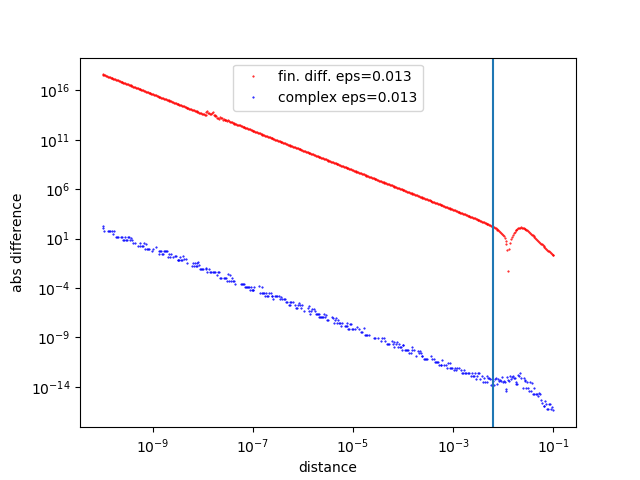

In [3]:
# visualize abs difference
g_prime_ = g_prime(x,eps)
diff_ = diff(x,eps)
cstep_ = cstep(x,eps)
fig, ax = plt.subplots()
plt.loglog(x,np.abs((g_prime_  - diff_)), 'r-',label='fin. diff. eps=%.3f' % eps, linestyle = 'None', marker='o', markersize=0.5)
plt.loglog(x,np.abs((g_prime_  - cstep_)), 'b-',label='complex eps=%.3f'% eps, linestyle = 'None', marker='o', markersize=0.5)
plt.xlabel('distance')
plt.axvline(x=eps/2)
plt.ylabel('abs difference')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


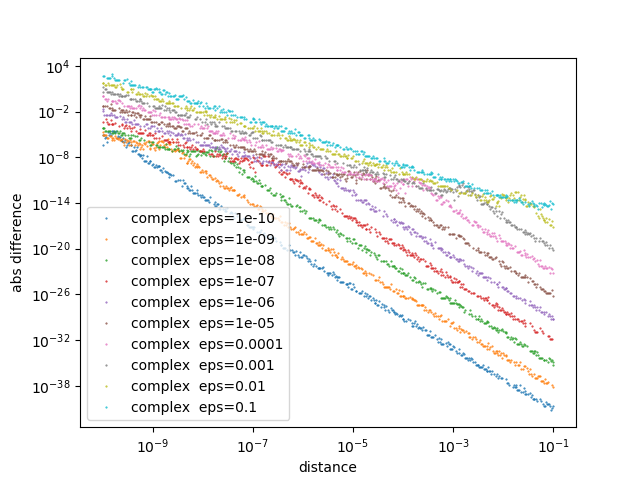

In [4]:
# visualize error
fig, ax = plt.subplots()
for veps in np.geomspace(1e-10, .1,10):

    g_prime_ = g_prime(x,veps)
    diff_ = diff(x,veps)
    cstep_ = cstep(x,veps)
#     plt.loglog(x,np.abs((g_prime_  - diff_)), label='fin. diff. eps=%s' % eps, linestyle = 'None', marker='o', markersize=0.5)
    plt.loglog(x,np.abs((g_prime_  - cstep_)),label='complex  eps=%.3g' % veps, linestyle = 'None', marker='o', markersize=0.5)
    
plt.xlabel('distance')
plt.ylabel('abs difference')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


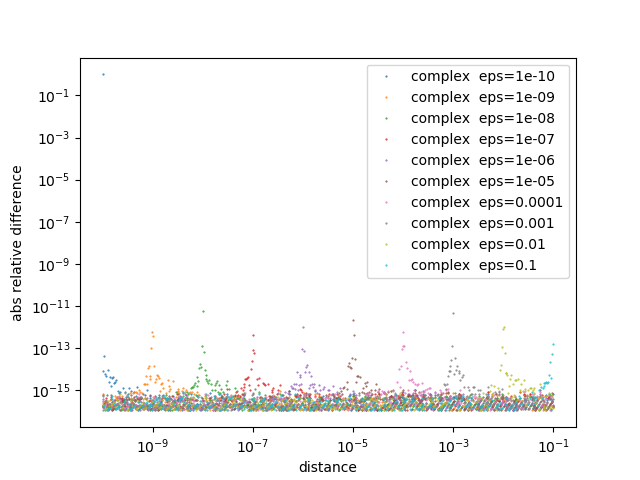

/Users/pancha/miniconda3/envs/ccd-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [5]:
# visualize error
fig, ax = plt.subplots()
for veps in np.geomspace(1e-10, .1,10):

    g_prime_ = g_prime(x,veps)
    diff_ = diff(x,veps)
    cstep_ = cstep(x,veps)
#     plt.loglog(x,np.abs((g_prime_  - diff_)), label='fin. diff. eps=%s' % eps, linestyle = 'None', marker='o', markersize=0.5)
    plt.loglog(x,np.abs((g_prime_  - cstep_)/g_prime_),label='complex  eps=%.3g' % veps, linestyle = 'None', marker='o', markersize=0.5)
    
plt.xlabel('distance')
plt.ylabel('abs relative difference')
plt.legend()
plt.show()

In [7]:
d = 0.000191693476787
eps = 1.953125e-04 
G.subs(var_x,d).subs(var_eps, eps)

In [8]:
DG.subs(var_x,d).subs(var_eps, eps)